<a href="https://colab.research.google.com/github/YashitaaArya/Facial-Emotion-Detection/blob/main/FaceEmotionDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed Jun 25 12:14:49 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install ultralytics

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.7/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="aOb4gFjOGGycb6ErUJTF")
project = rf.workspace("skripsi2-1r20w").project("data-primer-2")
version = project.version(9)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
dataset.location

'/content/data-primer-2-9/data-primer-2-9'

In [ ]:
!ls /content/data-primer-2-9/
%cd /content/data-primer-2-9

data-primer-2-9  runs  yolov8n.pt
/content/data-primer-2-9


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="aOb4gFjOGGycb6ErUJTF")
project = rf.workspace("skripsi2-1r20w").project("data-primer-2")
version = project.version(9)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to data-primer-2-9 in yolov8:: 100%|██████████| 8174/8174 [00:01<00:00, 8141.91it/s]


In [ ]:
# !unzip -o roboflow.zip -d data
!ls /content/data-primer-2-9/data-primer-2-9/


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
!yolo task=detect mode=train model="yolov8n.pt" data={dataset.location}/data.yaml epochs=50 imgsz=640

Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data-primer-2-9/data-primer-2-9/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True

In [ ]:
!ls /content/runs/detect/train2/weights/
%cd /content/runs/detect/train2/weights/

/content/runs/detect/train2/weights


In [ ]:
import yaml, json

with open("/content/runs/detect/train2/args.yaml", "r") as f:
    config = yaml.safe_load(f)

# with open("/content/export/config.json", "w") as f:
#     json.dump(config, f, indent=4)

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/runs/detect/train2/weights/last.pt')  # use last.pt instead
metrics = model.val()


FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/train2/weights/last.pt'

In [ ]:
from IPython.display import Image
Image(filename='/content/runs/detect/train2/results.png', width=600)
# # Check the contents of the runs directory
# !ls /content/runs/detect/train2/

FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/train2/results.png'

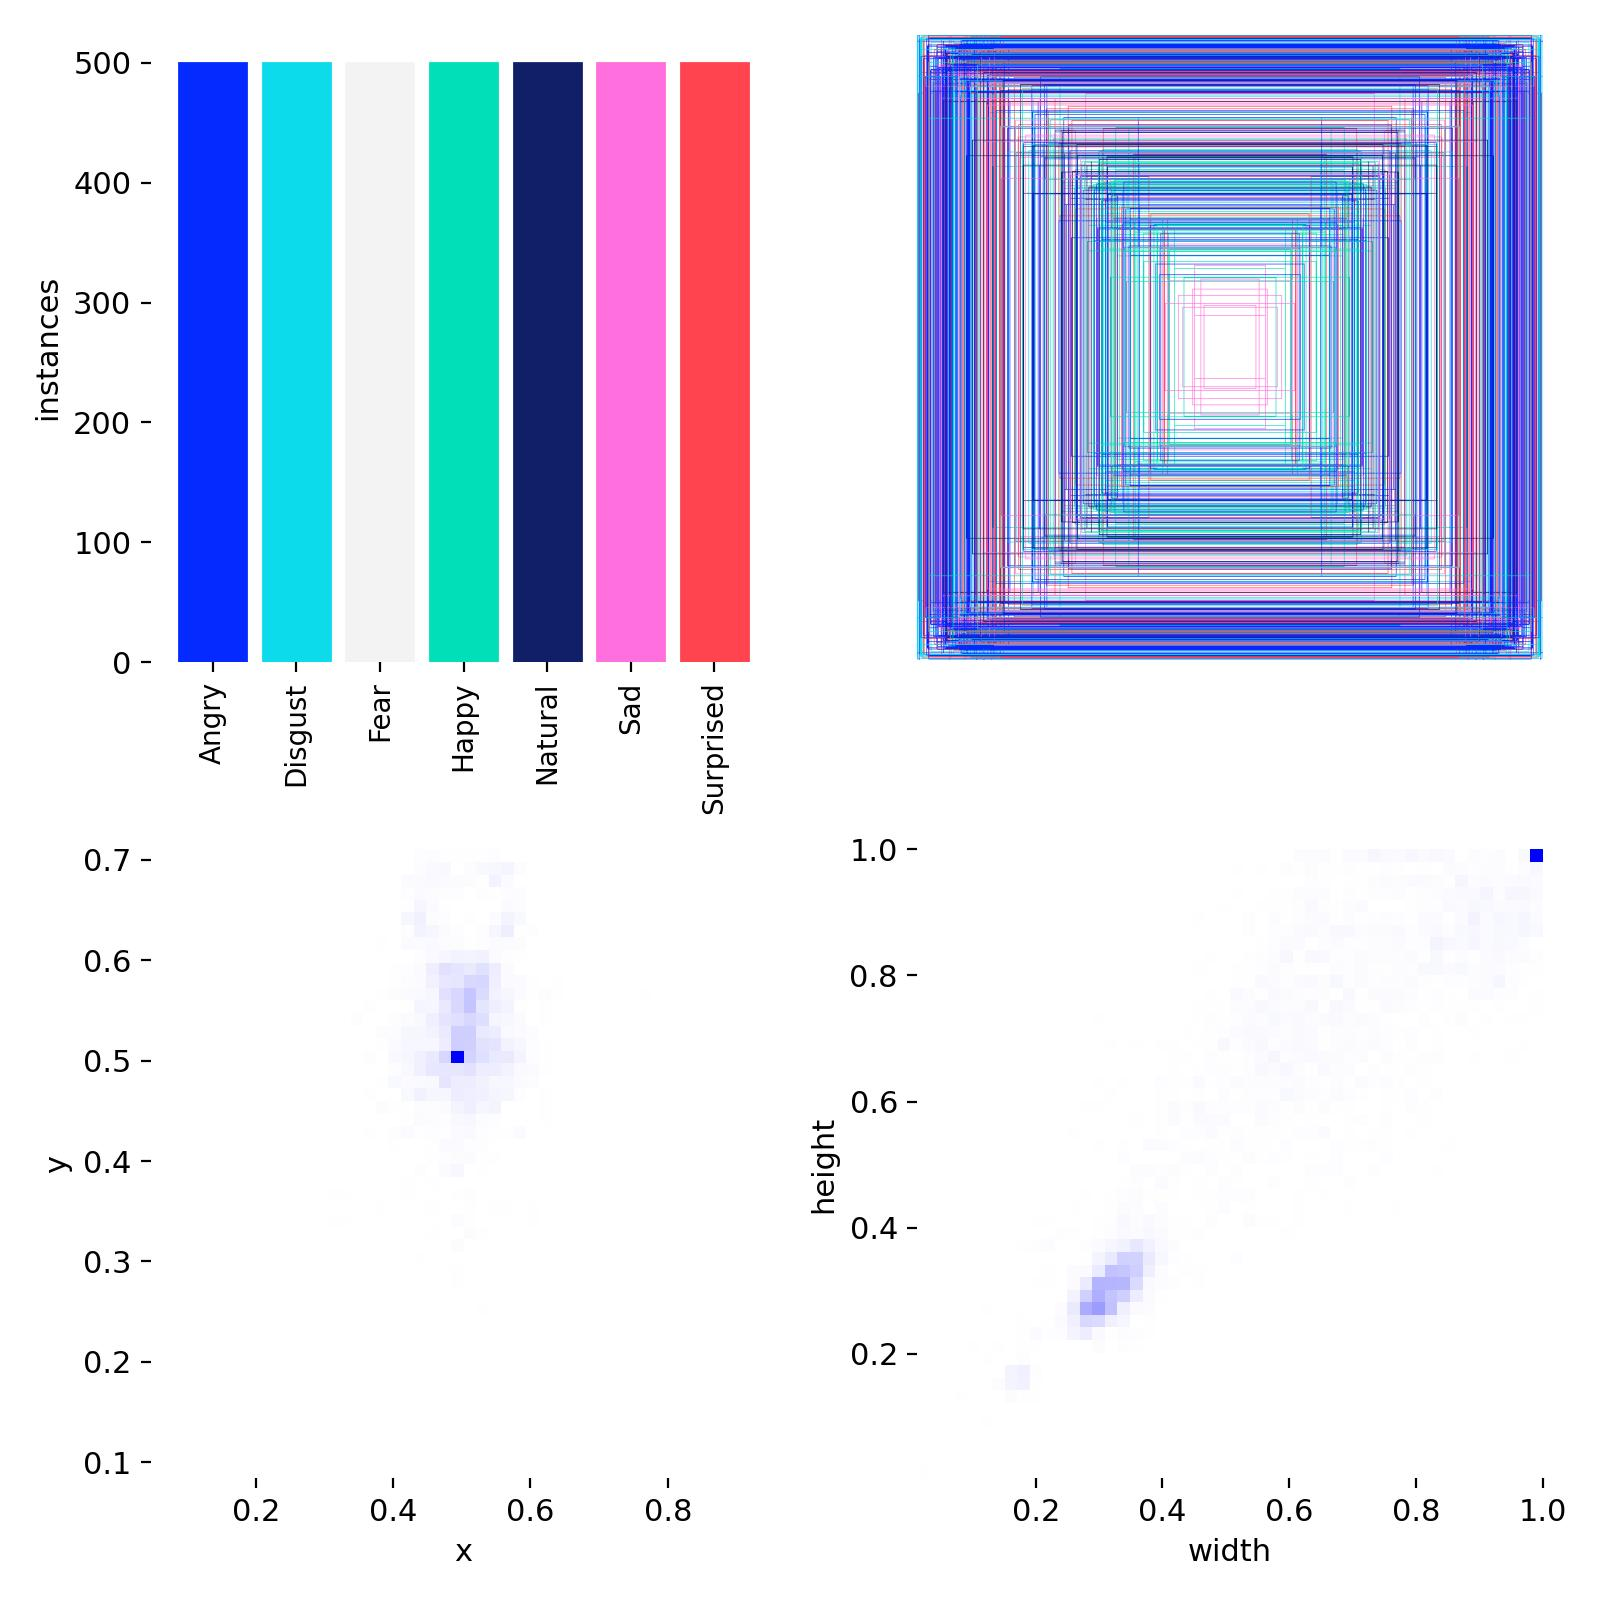

In [ ]:
Image('/content/runs/detect/train2/labels.jpg', width=600)

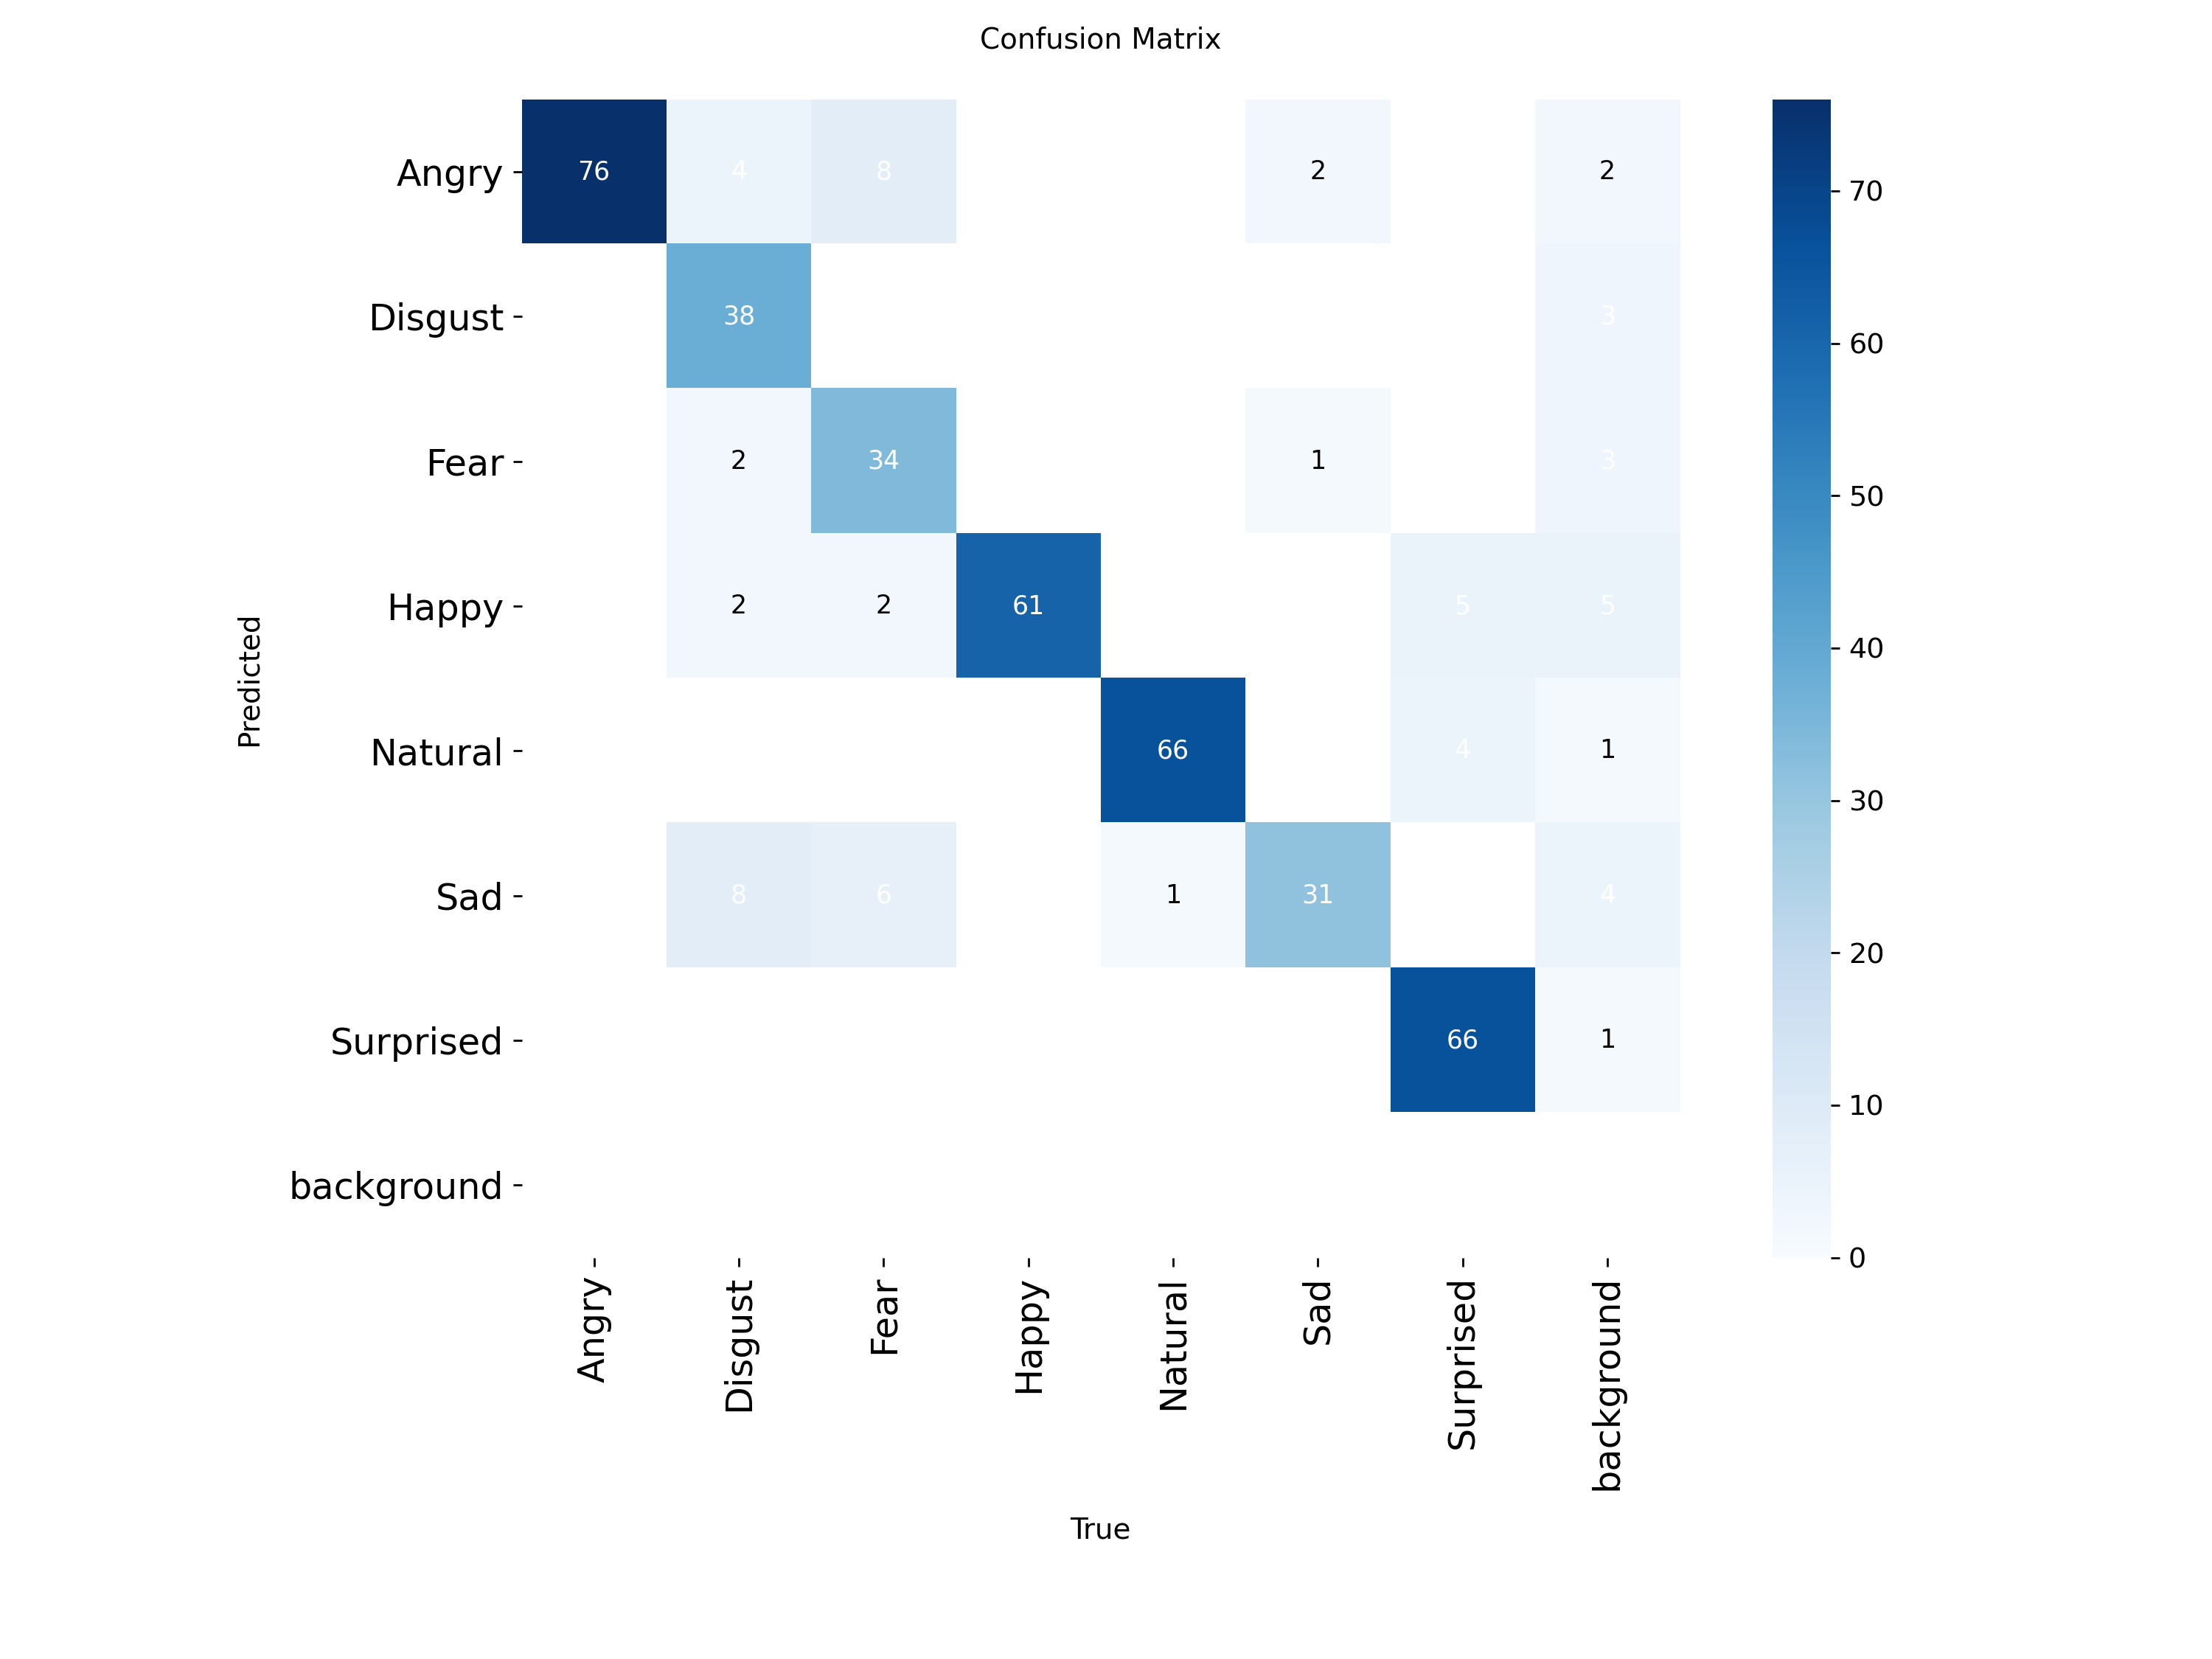

In [ ]:
Image('/content/runs/detect/train2/confusion_matrix.png', width=600)

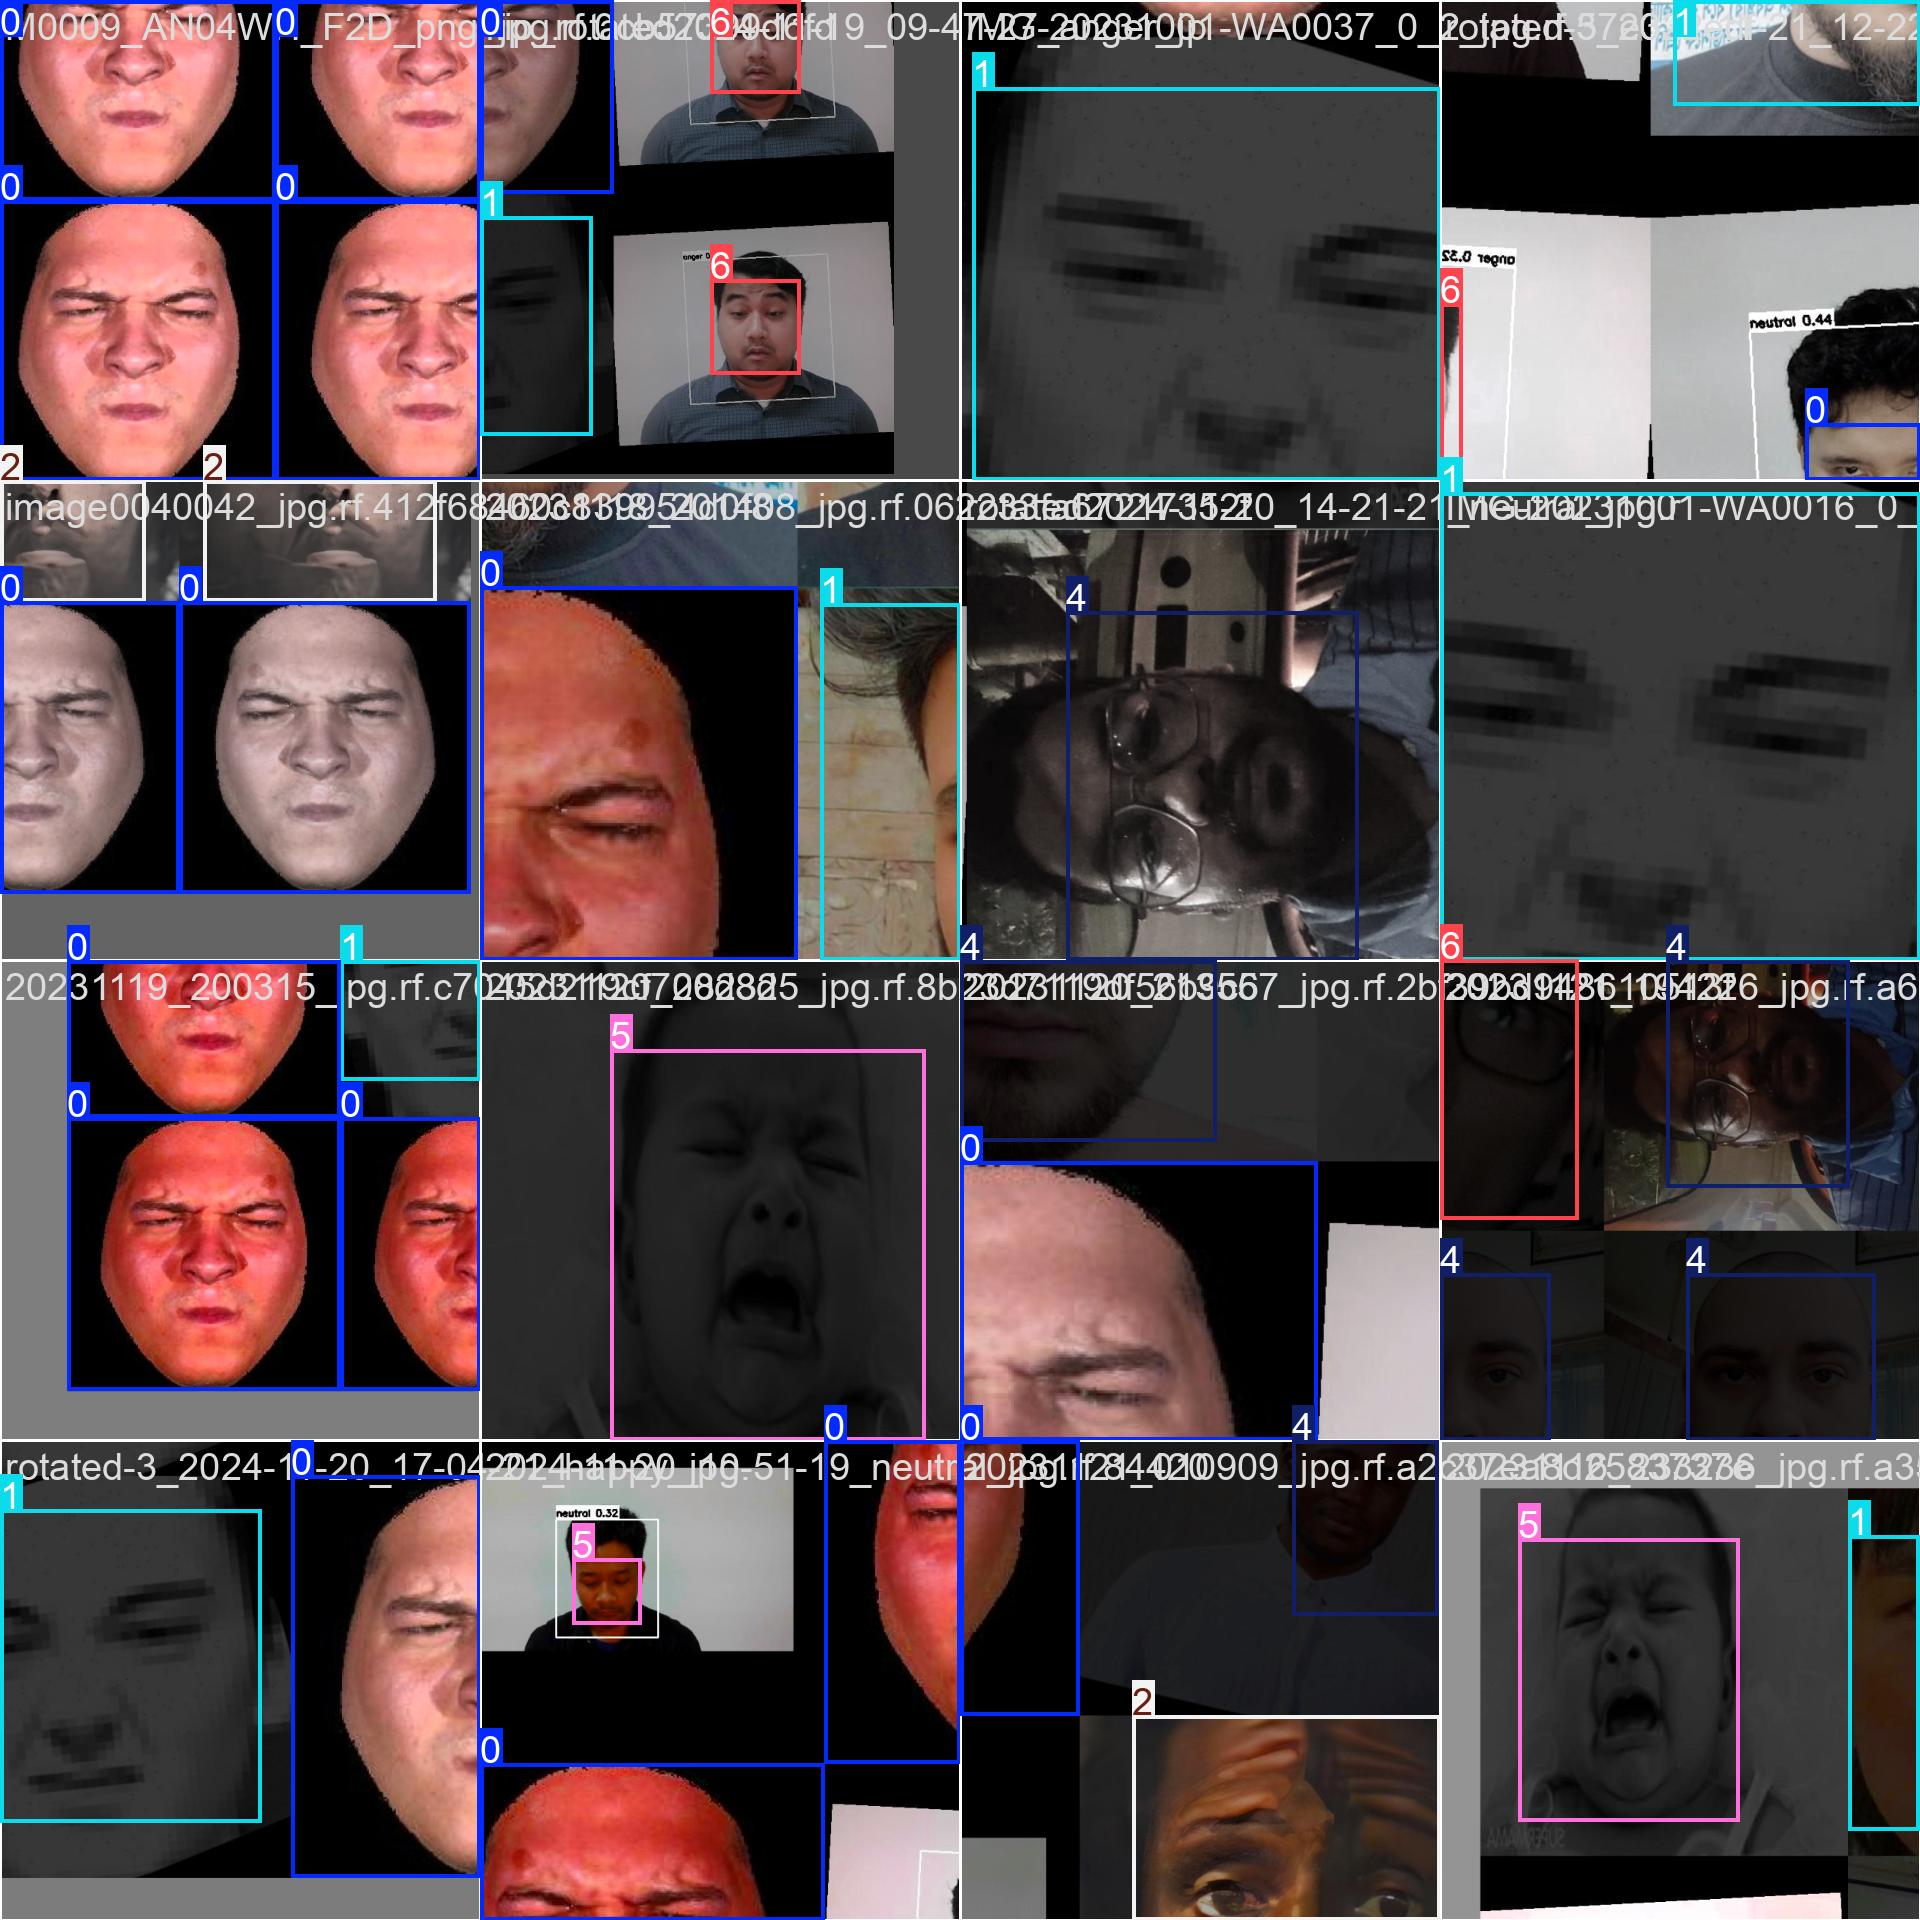

In [ ]:
Image('/content/runs/detect/train2/train_batch0.jpg', width=600)

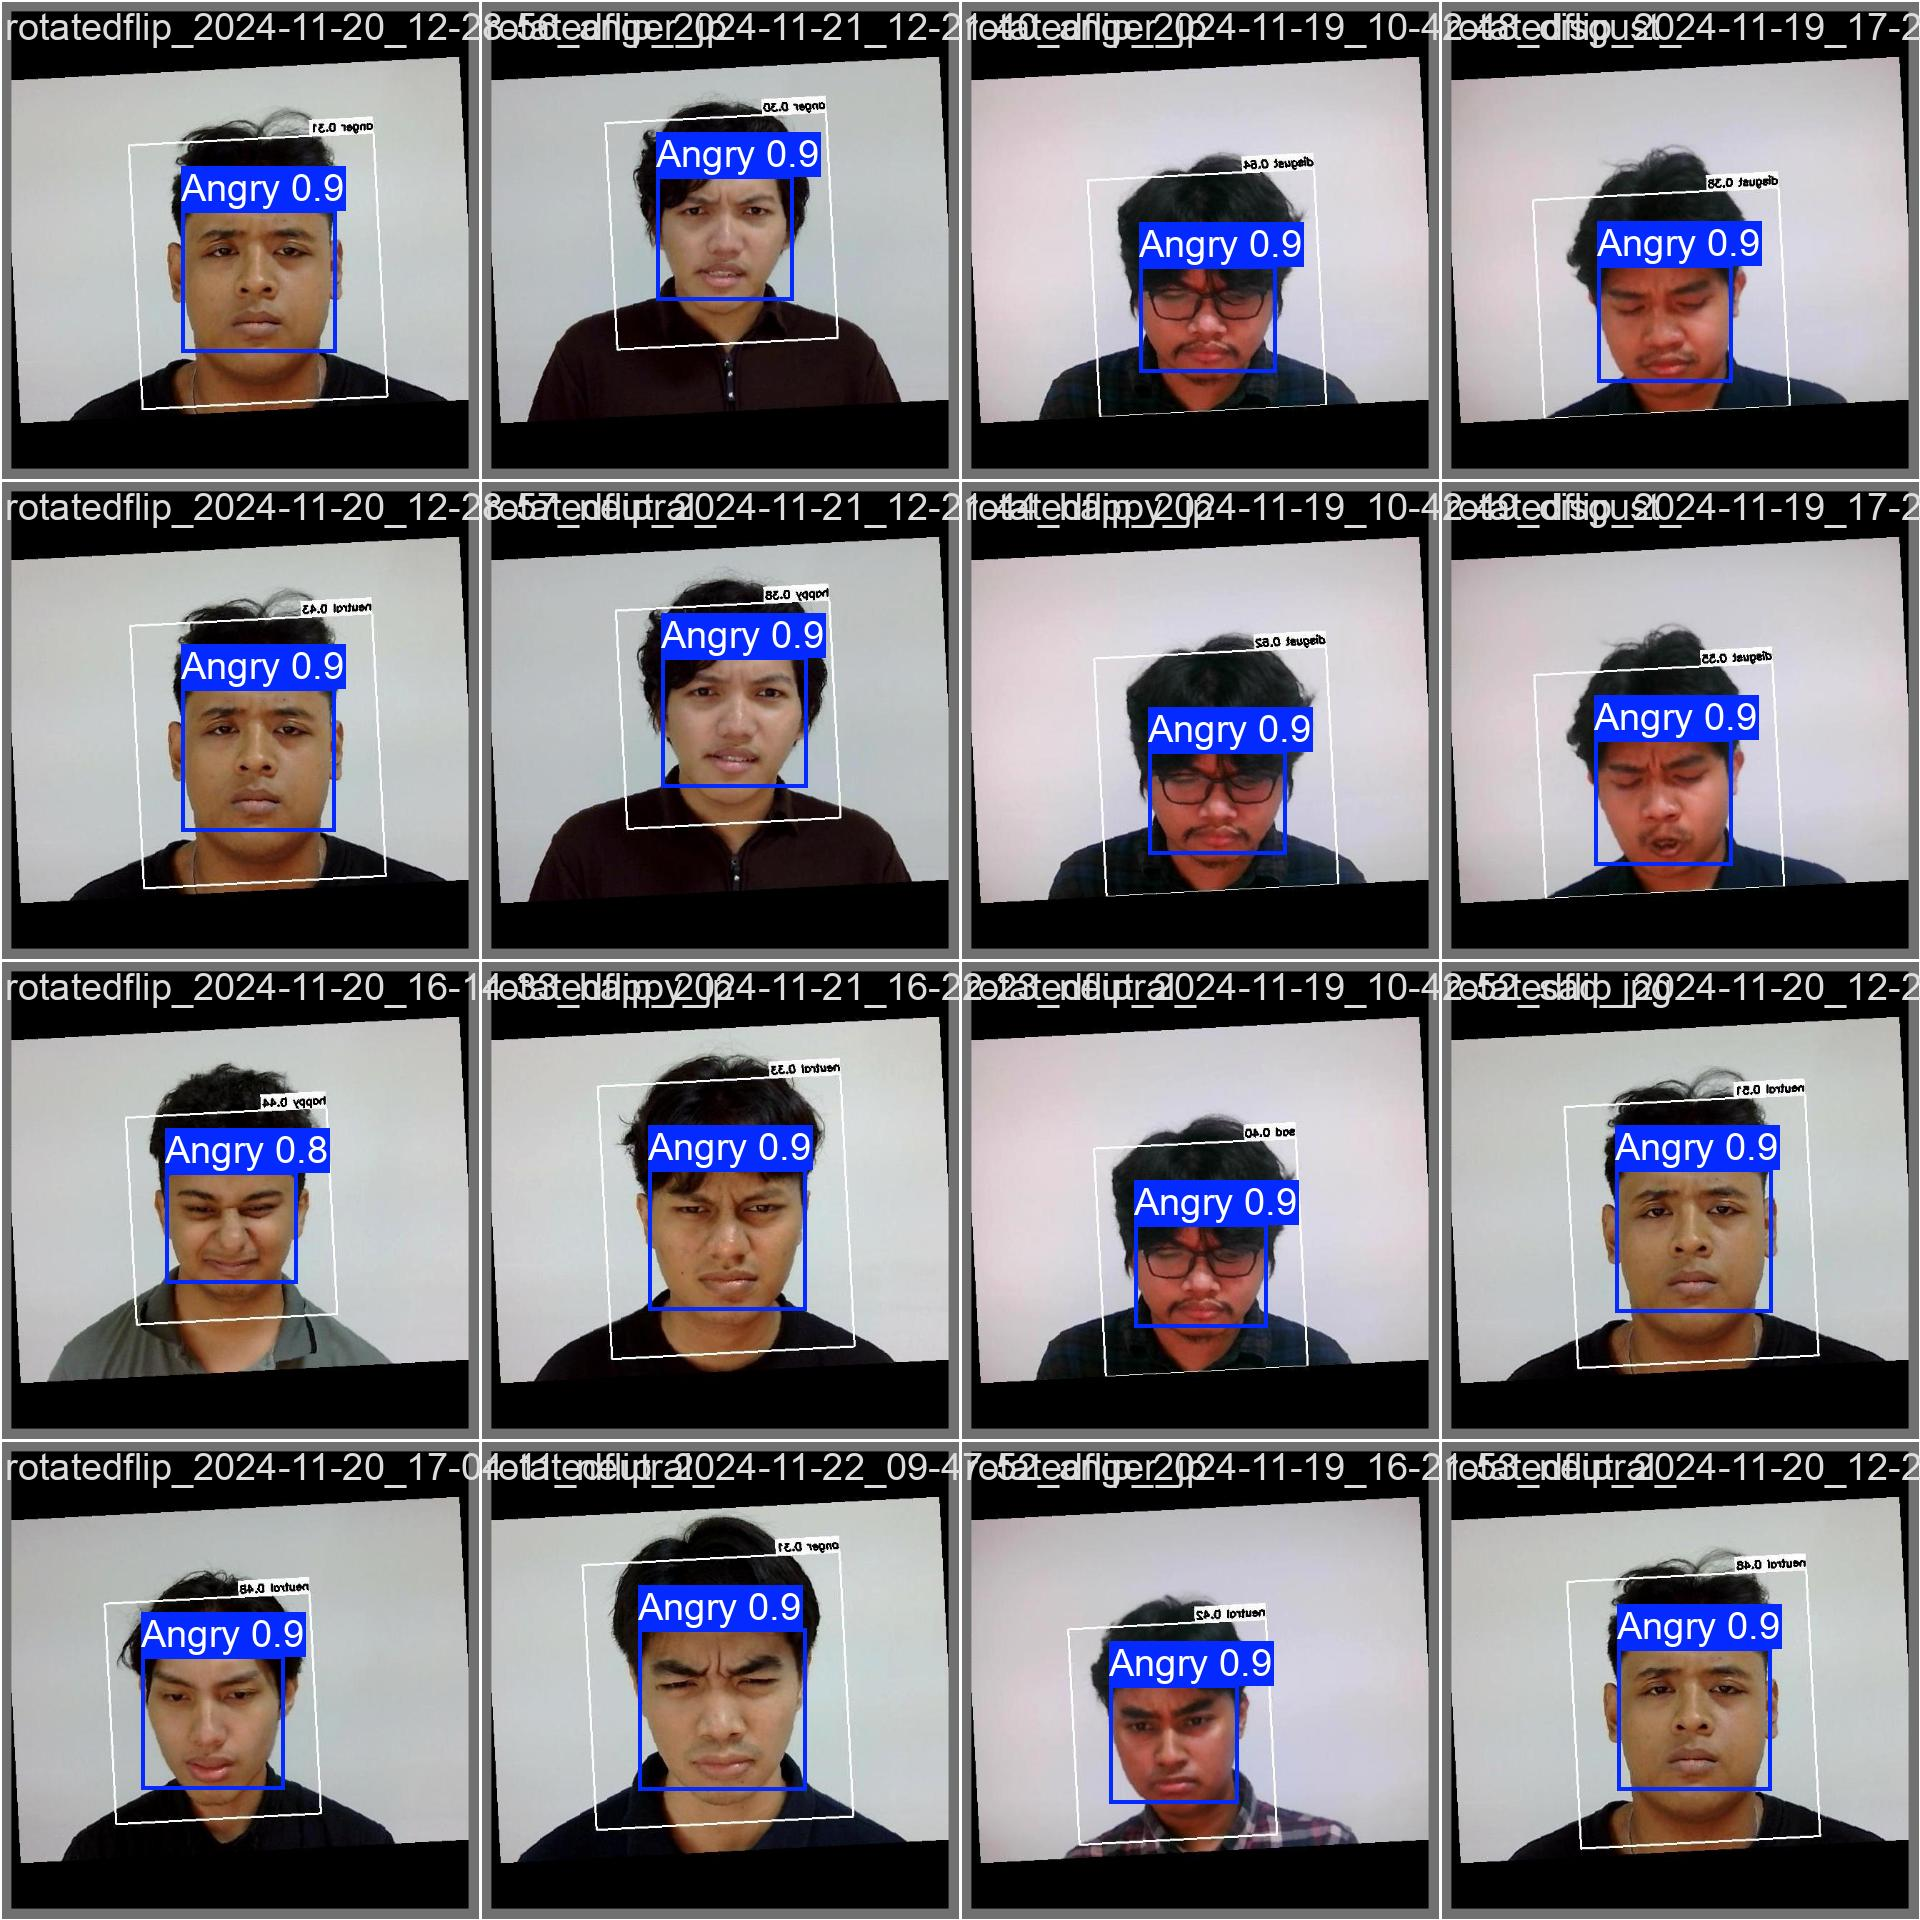

In [ ]:
Image('/content/runs/detect/train2/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train2/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1098.0±419.6 MB/s, size: 22.7 KB)
val: Scanning /content/data-primer-2-9/valid/labels.cache... 417 images, 0 backgrounds, 0 corrupt: 100% 417/417 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 27/27 [00:05<00:00,  4.59it/s]
                   all        417        417      0.932      0.847       0.94      0.705
                 Angry         76         76      0.884      0.987      0.967      0.717
               Disgust         54         54          1      0.685      0.933      0.718
                  Fear         50         50      0.943       0.64      0.877      0.647
                 Happy         61         61      0.845          1      0.939      0.713
               Natural         67         67      0.9

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train2/weights/best.pt" conf=0.25 source={dataset.location}/test/images/ save=True

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs

image 1/162 /content/data-primer-2-9/test/images/2024-11-19_09-47-10_anger_jpg.rf.0bd41493c95893276dd8777f44f18947.jpg: 640x640 1 Natural, 10.5ms
image 2/162 /content/data-primer-2-9/test/images/2024-11-19_09-47-50_disgust_jpg.rf.1e6010df0bb48a74e605c658e5773cce.jpg: 640x640 1 Disgust, 7.5ms
image 3/162 /content/data-primer-2-9/test/images/2024-11-19_10-42-25_disgust_jpg.rf.6b785c181364488d22a4dc4a6753da63.jpg: 640x640 1 Natural, 7.3ms
image 4/162 /content/data-primer-2-9/test/images/2024-11-19_10-42-35_disgust_jpg.rf.b6529406b4c656ea5782d8e818f8c494.jpg: 640x640 1 Surprised, 7.3ms
image 5/162 /content/data-primer-2-9/test/images/2024-11-19_16-21-50_anger_jpg.rf.5025cd8ce10c2f627daf2c59fe18f863.jpg: 640x640 1 Surprised, 7.4ms
image 6/162 /content/data-primer-2-9/test/images/2024-11-19_17-19-41_anger_jpg.rf.2b6edac04b0d17cb9d

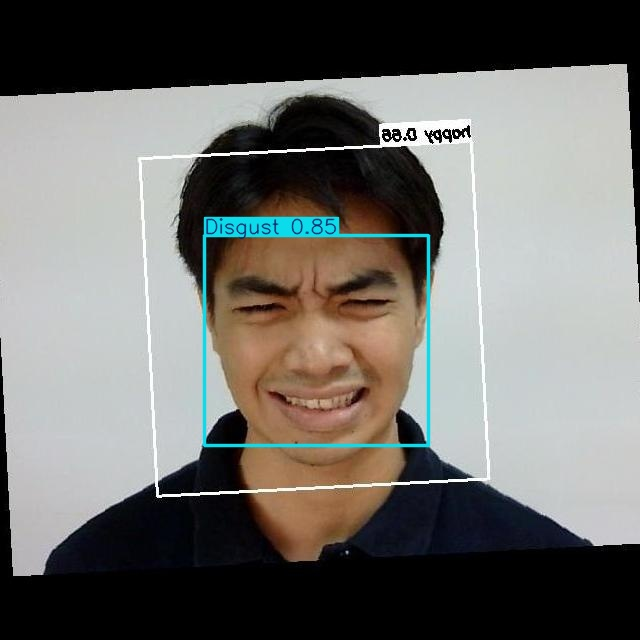

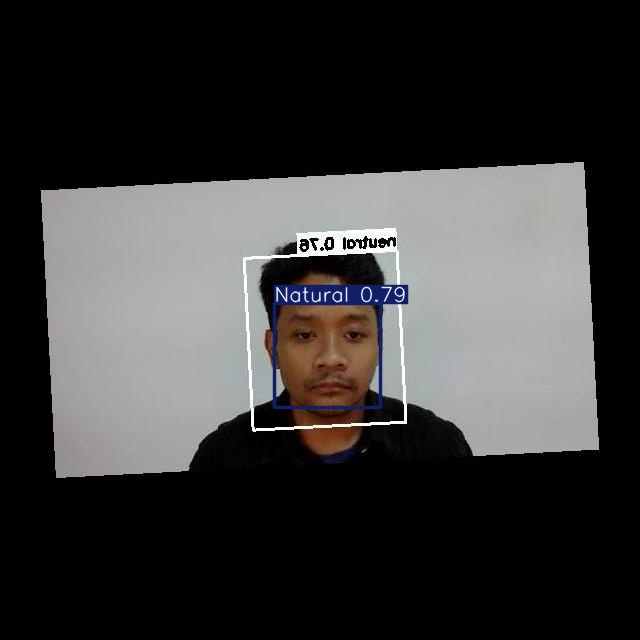

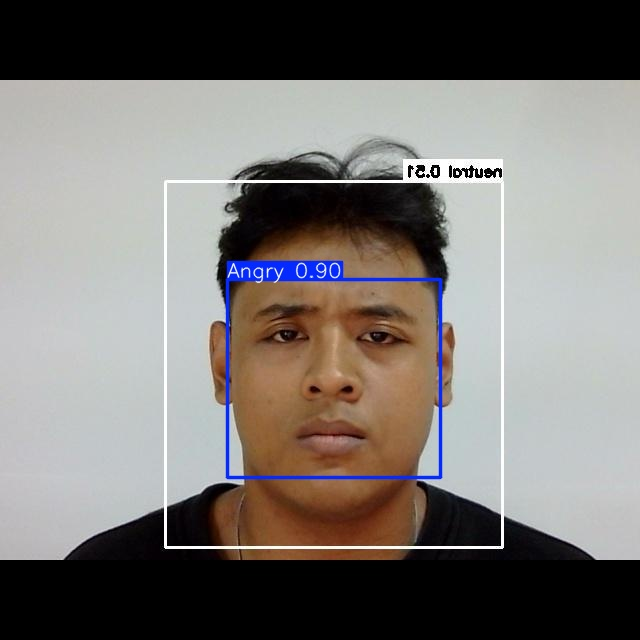

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display
latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for image_path in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
  display(IPyImage(filename=image_path, width=600))
  print("\n")

In [ ]:
from google.colab import files
files.download("runs/detect/train2/weights/best.pt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!cp -r /content/runs/detect/train2 /content/drive/MyDrive/yolo_results/train2


cp: cannot stat '/content/runs/detect/train2': No such file or directory


In [ ]:
# !cp /content/yolov11n.yaml architecture.yaml
# !ls /content/
!wget https://raw.githubusercontent.com/ultralytics/ultralytics/main/ultralytics/cfg/models/v8/yolov8n.yaml
!cp yolov8n.yaml yolo_teacher_model/model.config


--2025-05-29 13:45:32--  https://raw.githubusercontent.com/ultralytics/ultralytics/main/ultralytics/cfg/models/v8/yolov8n.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-05-29 13:45:32 ERROR 404: Not Found.

cp: cannot stat 'yolov8n.yaml': No such file or directory


In [ ]:
!wget https://raw.githubusercontent.com/ultralytics/ultralytics/main/ultralytics/models/v8/yolov8n.yaml -O architecture.yaml


--2025-05-29 12:56:35--  https://raw.githubusercontent.com/ultralytics/ultralytics/main/ultralytics/models/v8/yolov8n.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-05-29 12:56:36 ERROR 404: Not Found.



In [ ]:
from ultralytics import YOLO

model = YOLO("/content/runs/detect/train2/weights/best.pt")
model.info()

Model summary: 129 layers, 3,012,213 parameters, 0 gradients, 8.2 GFLOPs


(129, 3012213, 0, 8.2006016)

In [ ]:
## stage 1 : knowledge distillation

# preprocessing karna hai image ka
# 1. distortion
# 2. image grading change
# 3. hash banana
# ultralight weight pretrained mode for preprocessing : partial preprocessing
# ismein false positive and false negative ke chances hote toh hain (the partial training trick)

# step 2 : student model making
# link dia tha, usmei kuchh parts dikhenge :
# 1. make class for student model (no tensorflow kyunki no flexibility and researchability) (dominant by Pytorch)
# classes would have architecture and feed formal neural network
# 2. make safe teacher model ki sabka percentage isse way alag aaye toh make it "not found" types

# jitney architecture use kar rahe hain, only cnn banado toh bhi kaam ho jaayega
# minimalist delivery product banane ki koshish karna taaki integrate karke chize pa sako
# cnn ko sequentially kaise link kare, seekho pehle
# differnet types of models ko kaise link kare,
# cnn ko rnn ke saath kaise mix kia, vit ke saath, lstm ke saath, gru ko mix karne ka
# linking seekh gaye? ab kaunse type of model mei kitne layers lagane hain taaki final accuracy badhe
# experiment on number of layers to be used
# pair modelling ka use karna, increment decrement of layers karne ki koshish karna and check for accuracy
# check ki layer ka ratio kiss orientation mei hai
# derive pair ratio best kisme aaraha hai
# rearranging of layers (orientation of layers)
# experiment mei zaada epochs nhi lene yaad se
# jab final product test karoto training time zaada le sakta hai. tab koi dikkat nhi. that's the stage end.

# step 3 : sequencing teacher model

# step 4 : creating distillation loss function
# evolutionary loss function banana
# samajh ke likhna padega

# step 5 : configuring training loop
# uske baad when training loop works, tabhi losses milenge

# checkpoints much needed

# step 6 : dataset work
# image le raha hai, usko hash mei store kar raha hai
# directly yaml file ko import karna hai
# preprocessor ke baad transformer ka use karna hai

# per dataset class banana hai and har ek mei ek dataloader hoga
# jismei ek class banegi aur baad mei sabko combine karke ek final dataloader banayenge
# and dataloader mei preprocessing ki jayegi

In [ ]:
# stage 1 : 1-3 days to be precise | practically jitne bhi days we have (max priority)
# -> stage1 has to be parallely deployed on completion as early as possible kyunki fine tuning will take approx 1 day pura
# -> frontend bana ke
# stage 2 : 1 day is enough (default libraries exist which won't take much time to implement)
# stage 3 : max to max 1 day needed
# deployment setup : 10-15 mins
# frontend : jugaad laga lenge
# training loop will take generally 1 day
# dlf will take few hours

In [ ]:
# small version pe pehle focus karna
# versioning
# then modular approach


SyntaxError: invalid syntax (<ipython-input-1-ddb55c99f756>, line 1)